## Observations and Insights 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import csv

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df= pd.DataFrame.merge(mouse_metadata,study_results,
                    on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
# 1.-----------CLEANING THE DATA

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Get all the data for the duplicate mouse ID. 
merge_df.duplicated(subset=["Mouse ID","Timepoint"])

# Checking for null values 
na= pd.isnull(merge_df)

no=merge_df.isnull().values.any()

n= merge_df["Timepoint"].isnull().sum()

In [71]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
study_results= merge_df.dropna(how='any')
study_results.head()            

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
# Checking the number of mice in the clean DataFrame.
study_results.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [73]:
study_results.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [74]:
study_results["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [142]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen

mean_tumor = study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


In [117]:
# Drug regime per Tumor volume statistics: in a single line mean, median, variance, standard deviation and sem 
stats_tumor = study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem])


In [80]:
# Generating a summary statistics table of statiscs of Drug Regimen per Tumor Volume
stats_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


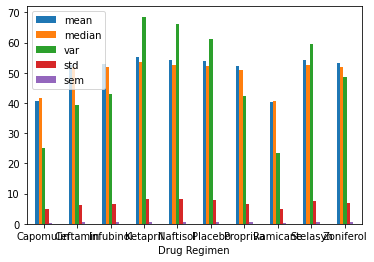

In [92]:
# Generate a bar plot using both Pandas's DataFrame that shows the total number of measurements taken for each 
#treatment regimen throughout the course of the study.

plot_stats_tumor = stats_tumor.plot.bar(rot=0)
#plot_stats_tumor[1].legend(loc=10)


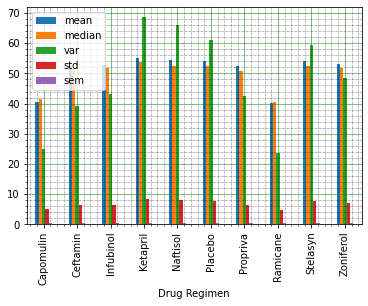

In [95]:
# Generate a bar plot using Matplotlib's pyplot that shows the total number of measurements taken for each 
#treatment regimen throughout the course of the study.

stats_tumor.plot(kind='bar')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()


## Bar and Pie Charts

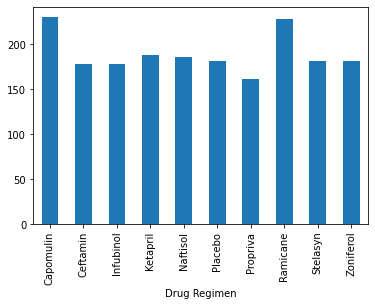

In [141]:
# Generate a bar plot showing the total number of measurements taken per drug regimen using pandas.

total_measures = study_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()

plot_total_measures = total_measures.plot.bar(rot=90)

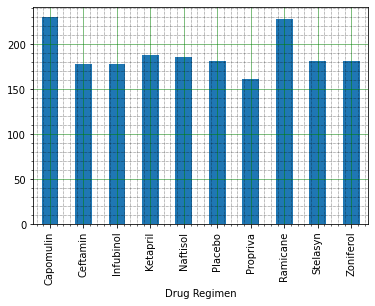

In [140]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measures


total_measures.plot(kind='bar')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()


In [ ]:
# 3.--------Pie Charts

In [ ]:
# The distribution of female versus male mice using pandas

total_measur_male= study_results.loc[(study_results["Sex"]== "Male")&(study_results["Drug Regimen"])]
#total_measur_male.count()

total_measur_female= study_results.loc[(study_results["Sex"]== "Female")&(study_results["Drug Regimen"])]
#total_measur_female.count()

([<matplotlib.patches.Wedge at 0x7fef0b1b7f40>,
 [Text(-0.7887477729166416, -0.904365496201087, 'Male'),
  Text(0.723018791840255, 0.8290017048509963, 'Female')],
 [Text(-0.4601028675347076, -0.527546539450634, '49.4%'),
  Text(0.39437388645832083, 0.4521827481005434, '50.6%')])

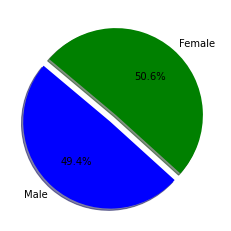

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [935,958]

# The colors of each section of the pie chart
colors = ["blue", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
